### Web Scraping
#### 1. (25 points) Crawl information from https://www.sciencedirect.com
(1) (13 points) Crawl some key information about all articles published in 2022 from the 
website https://www.sciencedirect.com/journal/journal-of-econometrics/issues, including 
year, volume, article content, title, authors and pages. Crawl the volume numbers from 226 
to 230 only.

In [6]:
import cfscrape
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [7]:
rawdata = cfscrape.create_scraper()
url = "https://www.sciencedirect.com/journal/journal-of-econometrics/issues"
response = rawdata.get(url).content

In [8]:
soup = BeautifulSoup(response, 'html.parser')

values = soup.find_all('li',class_='accordion-panel js-accordion-panel', limit=2)[1]

a_tags = values.find_all('a')

links = []

for tag in a_tags:
    links.append(tag.get('href'))
    
links[2:]

['/journal/journal-of-econometrics/vol/230/issue/2',
 '/journal/journal-of-econometrics/vol/230/issue/1',
 '/journal/journal-of-econometrics/vol/229/issue/2',
 '/journal/journal-of-econometrics/vol/229/issue/1',
 '/journal/journal-of-econometrics/vol/228/issue/2',
 '/journal/journal-of-econometrics/vol/228/issue/1',
 '/journal/journal-of-econometrics/vol/227/issue/2',
 '/journal/journal-of-econometrics/vol/227/issue/1',
 '/journal/journal-of-econometrics/vol/226/issue/2',
 '/journal/journal-of-econometrics/vol/226/issue/1']

In [9]:
crawl_summary = pd.DataFrame(np.ones((1, 5)), columns=['volume_name', 'article_type', 'title', 'author', 'page'])
crawl_summary

,volume_name,article_type,title,author,page
0,1.0,1.0,1.0,1.0,1.0


In [10]:
for link in links[2:]:
    url = "https://www.sciencedirect.com" + link
    response = rawdata.get(url).content
    soup = BeautifulSoup(response, 'html.parser')
    
    volume_name = soup.find_all('h2')[0].string

    articles = soup.find_all('li', class_='js-article-list-item article-item u-padding-xs-top u-margin-l-bottom')

    for article in articles:
        try:
            author = article.find_all('div', class_='text-s u-clr-grey8 js-article__item__authors')[0].string
        except:
            author = None

        if author is None:
            article_type = None
        else:
            article_type = 'Research article'

        title = article.find_all('span', class_='anchor-text')[0].string

        page = article.find_all('dd', class_='js-article-page-range u-clr-grey8 text-s')[0].string

        series=pd.Series({'volume_name':volume_name, 'article_type':article_type, 'title':title, 'author':author, 'page':page}) 
        crawl_summary=crawl_summary.append(series, ignore_index=True)

crawl_summary = crawl_summary.iloc[1:,:]

(2) (6 points) Remove “\xa0” in volume_name and store the crawled data into pandas 
DataFrame.

In [21]:
crawl_summary

,volume_name,article_type,title,author,page
1,"Volume 230, Issue 2",Research article,Predictive functional linear models with diver...,"Yanghui Liu, Yehua Li, Raymond J. Carroll, Nai...",Pages 221-239
2,"Volume 230, Issue 2",Research article,Global temperatures and greenhouse gases: A co...,"Li Chen, Jiti Gao, Farshid Vahid",Pages 240-254
3,"Volume 230, Issue 2",Research article,Nonparametric jump variation measures from opt...,Viktor Todorov,Pages 255-280
4,"Volume 230, Issue 2",Research article,Markov switching panel with endogenous synchro...,"Komla M. Agudze, Monica Billio, Roberto Casari...",Pages 281-298
5,"Volume 230, Issue 2",Research article,Sampling properties of the Bayesian posterior ...,"Giuseppe De Luca, Jan R. Magnus, Franco Peracchi",Pages 299-317
...,...,...,...,...,...
243,Annals Issue in Honor of Gary Chamberlain,Research article,Semiparametrically efficient estimation of the...,"Bryan S. Graham, Cristine Campos de Xavier Pinto",Pages 115-138
244,Annals Issue in Honor of Gary Chamberlain,Research article,Analyzing cross-validation for forecasting wit...,"Keisuke Hirano, Jonathan H. Wright",Pages 139-154
245,Annals Issue in Honor of Gary Chamberlain,Research article,"Who wins, who loses? Identification of conditi...",Maximilian Kasy,Pages 155-170
246,Annals Issue in Honor of Gary Chamberlain,Research article,Approximation of sign-regular kernels,Thomas A. Knox,Pages 171-191


(3) (6 points) Filter the author with Null value and then find the top 10 authors that published 
the most articles

In [11]:
authorssum = pd.DataFrame(np.ones((1, 2)), columns=['author', 'articles'])
authorssum

,author,articles
0,1.0,1.0


In [12]:
crawl_summary_filter = crawl_summary.dropna(subset=['author'])

for authors in crawl_summary_filter['author']:
    authors = authors.split(', ')
    for author in authors:
        if author in list(authorssum['author'].values):
            author_idx = list(authorssum['author'].values).index(author)
            authorssum.iloc[author_idx, 1] += 1
        else:
            series=pd.Series({'author':author, 'articles':1}) 
            authorssum=authorssum.append(series, ignore_index=True)

authorssum = authorssum.iloc[1:,:]
authorssum.sort_values(by='articles', ascending = False)

,author,articles
25,Zhijie Xiao,2.0
172,Francisco Blasques,2.0
262,Keisuke Hirano,2.0
49,Jun Yu,2.0
94,Ying Wang,2.0
...,...,...
106,Stanislav Anatolyev,1.0
107,Anna Mikusheva,1.0
108,Patrick W. Saart,1.0
109,Yingcun Xia,1.0


In [13]:
authorssum.sort_values(by='articles', ascending = False).iloc[:10,:]

,author,articles
25,Zhijie Xiao,2.0
172,Francisco Blasques,2.0
262,Keisuke Hirano,2.0
49,Jun Yu,2.0
94,Ying Wang,2.0
167,Congshan Zhang,2.0
168,Jia Li,2.0
196,Shiqing Ling,2.0
195,Chia-Lin Chang,2.0
174,Siem Jan Koopman,2.0


### Scikit-learn
#### 2. (10 points) Handwritten digits dataset loading and preprocessing
(1) (2 points) Load the digits data by load_digits.

In [7]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 


(2) (4 points) Use MinMaxScaler to normalize the covariates X

In [9]:
X = MinMaxScaler().fit_transform(digits.data)
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

(3) (4 points) Split the data into training and test set 
with test_size=0.2 and random_state=2020.

In [10]:
trainX,testX,trainY, testY = train_test_split(X, digits.target,test_size= 0.2,random_state=2020)
print(np.shape(trainX))
print(np.shape(trainY))
print(np.shape(testX))
print(np.shape(testY))

(1437, 64)
(1437,)
(360, 64)
(360,)


### 3. (15 points) Following question 2, fit the model specified below with different hyperparameters, and report the performance

(1) (7 points) Fit the naive bayes model MultinomialNB on the digits training set with 
different values of the parameter alpha α∈{1,2,…,20}.

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [11]:
alpha_list = list(range(1,21,1))
alpha_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [12]:
accuracy_list = []
for value in alpha_list:
    model = MultinomialNB(alpha = value)
    model.fit(trainX,trainY)
    modelY = model.predict(testX)
    acc = accuracy_score(modelY,testY)
    accuracy_list.append(acc)

(2) (4 points) Record the accuracy scores on the test set for each α

In [13]:
accuracy_list

[0.9027777777777778,
 0.9027777777777778,
 0.9055555555555556,
 0.9027777777777778,
 0.9027777777777778,
 0.9055555555555556,
 0.9055555555555556,
 0.9055555555555556,
 0.9055555555555556,
 0.9055555555555556,
 0.9055555555555556,
 0.9055555555555556,
 0.9055555555555556,
 0.9055555555555556,
 0.9083333333333333,
 0.9055555555555556,
 0.9027777777777778,
 0.9027777777777778,
 0.9,
 0.9]

(3) (4 points) Draw the line plot of the accuracy scores versus different α.

In [14]:
from matplotlib import pyplot as plt

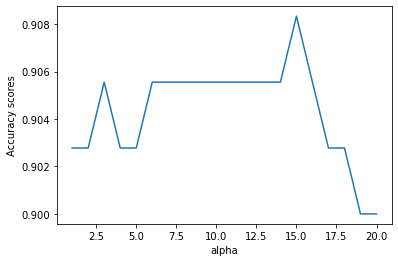

In [15]:
plt.plot(alpha_list,accuracy_list)
plt.xlabel("alpha")
plt.ylabel("Accuracy scores")
plt.show()

### 4. (15 points) Following question 2, apply dimensionality reduction methods applied on the digits dataset

(1) (3 points) Fit Principal Component Analysis (PCA, n_components=2) model to Digits 
training set for dimension reduction.

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(trainX)
X_train_pca = pca.transform(trainX)
X_test_pca = pca.transform(testX)
print("x_train_pca.shape: {}".format(X_train_pca.shape))

x_train_pca.shape: (1437, 2)


(2) (3 points) Apply model from (1) to train/test set for dimensionality reduction, compute 
the 2-dimensional embedded train/test set.

In [46]:
train_x_pca = pca.transform(trainX)
test_x_pca = pca.transform(testX)
train_x_pca

array([[ 1.45457902, -0.20417927],
       [-0.34515514, -0.38834821],
       [-0.01976203, -0.39623584],
       ...,
       [ 1.56183794,  0.37545569],
       [-1.31165523,  0.72074509],
       [-0.65401108,  1.06848075]])

In [45]:
test_x_pca

array([[-1.00187344e+00, -3.95974128e-02],
       [ 1.52495164e+00,  1.33075926e-01],
       [-9.92707823e-01,  1.04036982e+00],
       [-1.08652974e+00, -6.32439823e-01],
       [ 4.85713418e-01, -5.54941825e-02],
       [ 1.30735502e-01, -1.07511951e+00],
       [ 8.64291682e-01, -4.21389316e-01],
       [ 6.54635063e-02, -7.50285806e-01],
       [-1.17516963e-01, -1.26166382e+00],
       [-6.44178166e-01, -4.68809202e-01],
       [ 1.32660506e+00, -6.17071535e-01],
       [ 7.27955024e-01,  5.00241152e-02],
       [-8.76734996e-01,  3.50219951e-01],
       [ 1.09046638e+00, -7.24643910e-01],
       [ 7.56816087e-01,  3.93925519e-01],
       [-8.07761973e-02, -6.90079812e-01],
       [ 8.50392031e-01, -2.42638341e-01],
       [ 2.55094390e-01,  3.83745167e-01],
       [ 3.28132109e-01, -1.17574485e+00],
       [ 9.33985019e-02,  8.57594969e-01],
       [ 8.67619228e-01, -8.19941758e-01],
       [-4.31248543e-02,  3.31611222e-01],
       [ 1.34377900e+00, -7.61530338e-02],
       [-5.

(3) (3 points) Fit a nearest neighbor classifier (KNN, n_neighbors=3) on the embedded 
training set. Compute the nearest neighbor accuracy on the embedded test set, plot the 
projected test set points and show the evaluation score. 


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(train_x_pca,train_y)

predict_y = knn_model.predict(test_x_pca)
accuracy = accuracy_score(predict_y,test_y)
accuracy

0.6027777777777777

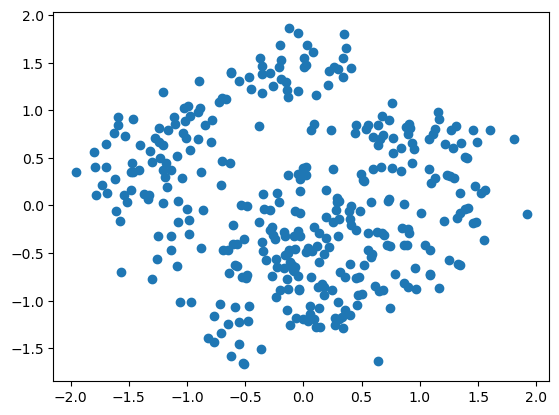

In [53]:
plt.figure()
plt.scatter(test_x_pca[:,0],test_x_pca[:,1])
plt.show()

(4) (6 points) Use Neighborhood Components Analysis (NCA, n_components=2) for 
dimensionality reduction, repeat (1), (2) and (3).

In [54]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA

In [56]:
nca = NCA(n_components=2)
nca.fit(train_x,train_y)

NeighborhoodComponentsAnalysis(n_components=2)

In [55]:
train_x_nca = nca.transform(train_x)
test_x_nca = nca.transform(test_x)
train_x_nca

array([[-226.29472884,  -20.546363  ],
       [ -39.32092218,  -58.23906052],
       [ -59.43018086,  -78.64835701],
       ...,
       [-206.99141899,   45.10816831],
       [  88.03971728,  -18.6602729 ],
       [  82.83892612,   22.69523068]])

In [57]:
test_x_nca

array([[ 9.22133929e+01, -1.11710099e+02],
       [-2.35326210e+02,  1.96174283e+01],
       [ 7.24768660e+01,  7.89145077e-01],
       [ 6.96904264e+01, -1.34478612e+02],
       [-1.30564051e+02, -2.46844848e+01],
       [-1.31124906e+02, -1.53509045e+02],
       [-1.98138572e+02, -2.59475417e+01],
       [-1.68397024e+02, -1.33762564e+02],
       [-9.21217792e+01, -1.52800089e+02],
       [-5.14277981e+01, -1.32024927e+02],
       [-2.14577553e+02, -9.60298476e+00],
       [-8.99451875e+01, -1.55312747e+01],
       [ 6.63855478e+01, -6.55885975e+01],
       [-2.61267925e+02, -9.75579357e+01],
       [-1.20071241e+02,  1.97861356e+01],
       [-1.25824477e+02, -1.04599233e+02],
       [-1.97358201e+02, -6.99696015e+01],
       [-1.75647463e+01, -2.91514169e+01],
       [-8.35598340e+01, -9.56317459e+01],
       [ 3.43271986e+01,  3.87532586e+01],
       [-2.35879502e+02, -8.45922230e+01],
       [-1.38721472e-01, -1.22773486e+01],
       [-1.88834514e+02,  2.46992190e+00],
       [-8.

In [61]:
nca_model = KNeighborsClassifier(n_neighbors = 3)
nca_model.fit(train_x_nca,train_y)

KNeighborsClassifier(n_neighbors=3)

In [62]:
predict_y_nca = nca_model.predict(test_x_nca)
score_nca = accuracy_score(predict_y_nca,test_y)
score_nca

0.7305555555555555

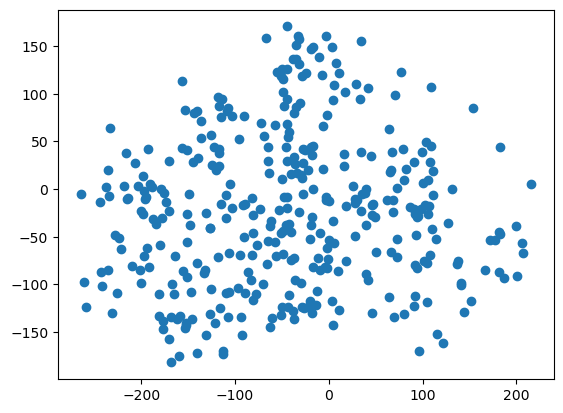

In [63]:
plt.figure()
plt.scatter(test_x_nca[:,0],test_x_nca[:,1])
plt.show()

### 5. (18 points) Face and Eye Detection

(1) (12 points) Please write down the code to detect the faces and the eyes in face.jpg. Draw 
the red rectangle for the faces and the green rectangle for the eyes.

In [1]:
import cv2
img1 = cv2.imread('face.jpg')
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
face_detector = cv2.CascadeClassifier("face.xml")
faces = face_detector.detectMultiScale(gray, 1.1, 3,cv2.CASCADE_SCALE_IMAGE,(1,1),(400,400))

eye_detector = cv2.CascadeClassifier("eye.xml")
eyes = eye_detector.detectMultiScale(gray, 1.1, 3,cv2.CASCADE_SCALE_IMAGE,(1,1),(400,400))

for (x,y,w,h) in faces:
    cv2.rectangle(img1,(x, y),(x + w,y + w),(0, 0, 255),2)

for (x,y,w,h) in eyes:
    cv2.rectangle(img1,(x, y),(x + w,y + w),(0, 255, 0),2)
    
cv2.imshow("img",img1)
cv2.waitKey(0)

-1

(2) (6 points) If we want to open the front camera for video capturing and performing face 
and eye detection. How can we modify the above codes?

In [24]:
import cv2
from PIL import Image,ImageTk
import tkinter 
face_detector = cv2.CascadeClassifier('face.xml')
eye_detector = cv2.CascadeClassifier("eye.xml")

cap = cv2.VideoCapture(0)
cnt_ss = 0

while True:
    flag,frame = cap.read()
    if not flag : 
        break
    gray = cv2.cvtColor(frame,code=cv2.COLOR_BGR2GRAY)
    face = face_detector.detectMultiScale(gray, 1.1, 3,cv2.CASCADE_SCALE_IMAGE,(1,1),(400,400))
    eyes = eye_detector.detectMultiScale(gray, 1.1, 3,cv2.CASCADE_SCALE_IMAGE,(1,1),(400,400))
    
    for (x,y,w,h) in face:
        cv2.rectangle(frame,(x, y),(x + w,y + w),(0, 0, 255),2)
    for (x,y,w,h) in eyes:
        cv2.rectangle(frame,(x, y),(x + w,y + w),(0, 255, 0),2)

    cv2.imshow('img',frame) 
    cv2.waitKey(0)
    
    cv2.destroyAllWindows()
    cap.release()